<a href="https://colab.research.google.com/github/MittalNeha/EIP4/blob/master/Week3/Assignment_6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Target for model

390/390 [==============================] - 21s 53ms/step - loss: 0.3320 - acc: 0.8873 - val_loss: 0.5964 - val_acc: 0.8226
```



In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D

In [0]:
from keras.datasets import cifar10

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [9]:
train_labels.shape

(50000, 1)

In [10]:
test_labels.shape

(10000, 1)

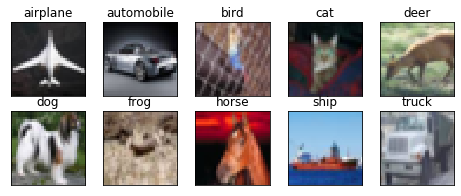

In [11]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [14]:
train_labels[0]

array([6], dtype=uint8)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [16]:
model = Sequential()

model.add(SeparableConv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3))) #32,32,32
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(64, kernel_size=(3,3), activation='relu', padding='same')) #32,32,64
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(2,2))  #16, 16, 64

model.add(Convolution2D(32, 1,1, activation='relu', border_mode='same')) #16, 16, 32
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(64, kernel_size=(3,3), activation='relu', padding='same')) #16, 16, 64
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(128, kernel_size=(3,3), activation='relu', padding='same')) #16, 16, 128
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(2,2))  #8,8,128

model.add(Convolution2D(64, 1,1, activation='relu', border_mode='same')) #8,8,64
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(128, kernel_size=(3,3), activation='relu', padding='same')) # 8,8,128
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(SeparableConv2D(256, kernel_size=(3,3), activation='relu', padding='same')) #8,8,256
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Convolution2D(num_classes, 1, activation='relu', padding='same')) #8,8,10
model.add(BatchNormalization())

model.add(GlobalAveragePooling2D()) #1,1,10

model.add(Activation('softmax'))












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1), activation="relu", padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 1), activation="relu", padding="same")`


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 32, 32, 32)        155       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 32, 32, 64)        2400      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)       

In [0]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=4, min_lr=0.0001, verbose=1)

In [0]:
from keras.callbacks import Callback

class MyCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    print('lr = {}'.format(K.eval(self.model.optimizer.lr)))

my_cb = MyCallback()
chk_point_cb = ModelCheckpoint('model/weights.hdf5', save_best_only=True, monitor='val_acc', mode='max', verbose=1)

In [20]:
# Compile the model
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':




Epoch 1/50
390/390 [==============================] - 31s 78ms/step - loss: 1.4039 - acc: 0.5005 - val_loss: 2.4147 - val_acc: 0.4126
Epoch 2/50
390/390 [==============================] - 24s 62ms/step - loss: 1.0375 - acc: 0.6361 - val_loss: 1.2441 - val_acc: 0.6241
Epoch 3/50
390/390 [==============================] - 24s 62ms/step - loss: 0.8892 - acc: 0.6897 - val_loss: 1.4903 - val_acc: 0.5334
Epoch 4/50
390/390 [==============================] - 24s 62ms/step - loss: 0.8012 - acc: 0.7226 - val_loss: 1.1349 - val_acc: 0.6420
Epoch 5/50
390/390 [==============================] - 24s 62ms/step - loss: 0.7333 - acc: 0.7460 - val_loss: 0.9463 - val_acc: 0.6695
Epoch 6/50
390/390 [==============================] - 24s 62ms/step - loss: 0.6904 - acc: 0.7612 - val_loss: 1.0006 - val_acc: 0.6728
Epoch 7/50
390/390 [==============================] - 24s 62ms/step - loss: 0.6593 - acc: 0.7710 - val_loss: 0.7308 - val_acc: 0.7498
Epoch 8/50
390/390 [==============================] - 24s 62

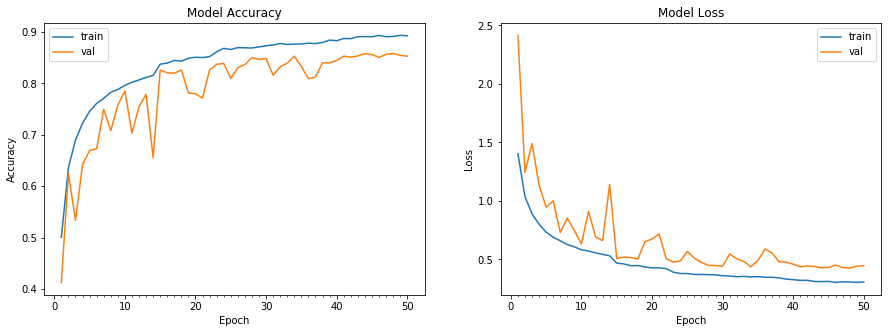

Accuracy on test data is: 85.31


In [21]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=[reduce_lr])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model
# model = Sequential()
# model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
# model.add(Activation('relu'))
# model.add(Convolution2D(48, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Convolution2D(96, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(Convolution2D(96, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Convolution2D(192, 3, 3, border_mode='same'))
# model.add(Activation('relu'))
# model.add(Convolution2D(192, 3, 3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(256))
# model.add(Activation('relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))
